# Assignment 3 
*by Sharanya Saha, 2111056*
<br> sharanya21@iitk.ac.in
### <center> Answer 1 <center>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt

### The Perceptron Algorithm :
Step 1: Initialize w = $ w^{(0)} $ , t=0, set $ \eta_{t} $ = 1,  $ \forall$ t <br>
Step 2: Pick some ($x_{n}$,$y_{n}$) randomly <br>
Step 3: If current w makes a mistake on ($x_{n}$,$y_{n}$) i.e. $y_{n} w^{(t)}x_{n} < 0 $ <br>
         <center>              $ \ \ \ w^{(t+1)} = w^{t} + y_{n}x_{n} $ <br>
 t = t+1 </center> <br>
Step 4: If not converged, Go to step 2

#### Implementation of the above algorithm  :
1) $ \eta_{t} $ is denoted by H in the code and has a default value of 1. <br>
2) A function named check_convergence is implemented to check for convergence of the algorithm. The variable convergence helps to keep a track whether the weights are updated in consecutive iterations or not.

###### Convergence of the algorithm:  
The algorithm is assumed to be converged if it doesn't make any mistake for k consecutive iterations. The value of k has been taken as 80 of now (i.e. The algorithm converges it it doesn't make any mistake in 80 consecutive iterations). A suitable value of k will be determined later using cross-validation.


In [2]:
#The function is used to check whether the algorithm has converged or not
def check_convergence(convergence,k) :
    if convergence==k :
        return 1
    return 0

In [3]:
def stochaistic_subGD(X, Y,H=1,k=80,iterations=10000):
    w_t = np.ones(4) #There are 4 features 
    convergence=0
    for i in range(iterations):
        n = randint(0, len(X)-1)
        x_n, y_n = X[n], Y[n]
        if y_n*np.dot(w_t,x_n) < 0 : #check if there is a mistake
            w_t = w_t + H*y_n*x_n
            convergence=0
        else :
            convergence=convergence+1
        if check_convergence(convergence,k) :
            #print('converged '+str(i)+'th iteration')
            break        
    return w_t

###  Importing and Preprocessing the dataset: 
**Dataset**: Banknote authentication Data Set *from UCI Machine learning repository*

In [4]:
#Reading the dataset
df = pd.read_csv('data_banknote_authentication.txt', names=["variance","skewness","curtosis","entropy","class"])

In [5]:
# Dimensions of the dataset
df.shape

(1372, 5)

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df.shape

(1372, 5)

Handling NULL values in the dataset:

In [9]:
#checking for NULL values is the dataset
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

The given dataset doesn't contain any NULL values

In [10]:
#Checking the data types of the columns
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
#removing duplicates from the data
df.drop_duplicates(subset=None,keep='first',inplace=True,ignore_index=True)
df.shape

(1348, 5)

**Checking for anomalous data:**

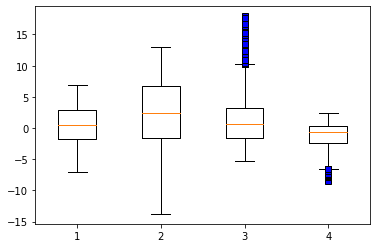

In [12]:
rs=dict(markerfacecolor='b',marker='s')
plt.boxplot([df['variance'],df['skewness'],df['curtosis'],df['entropy']],flierprops=rs)
plt.show()

**Conclusion from the above diagrams:** <br>
There are outliers in entropy and curtosis column.<br><br>
**Handling the outliers:** <br>
For entropy column :

In [13]:
entropy_10=df['entropy'].quantile(0.10)
entropy_90=df['entropy'].quantile(0.90)

In [14]:
df["entropy"] = np.where(df["entropy"] <entropy_10,entropy_10,df['entropy'])

For curtosis column :

In [15]:
c_10=df['curtosis'].quantile(0.10)
c_90=df['curtosis'].quantile(0.90)

In [16]:
df["curtosis"] = np.where(df["curtosis"] >c_90, c_90,df['curtosis'])

**After handling outliers :**

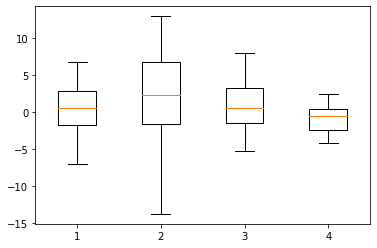

In [17]:
rs=dict(markerfacecolor='b',marker='s')
plt.boxplot([df['variance'],df['skewness'],df['curtosis'],df['entropy']],flierprops=rs)
plt.show()

**Normalizing the features:**

In [18]:
#Normalizing the feature values 
df_normalised=df.copy()
df = (df_normalised - df_normalised.mean())/(df_normalised.std())
#Class is to be predicted so replacing it with original values
df['class']=df_normalised['class']

In [19]:
df['class'].values

array([0, 0, 0, ..., 1, 1, 1])

Replacing the class label '0' with '-1'

In [20]:
df["class"].replace(0, -1, inplace=True)
df['class'].values

array([-1, -1, -1, ...,  1,  1,  1])

Dataset after Preprocessing :

In [21]:
df.head()

,variance,skewness,curtosis,entropy,class
0,1.109298,1.151392,-1.076511,0.327458,-1
1,1.432151,1.066415,-0.981123,-0.242652,-1
2,1.194665,-0.774859,0.217795,0.638283,-1
3,1.051664,1.297373,-1.405839,-1.440204,-1
4,-0.040709,-1.084456,0.942049,0.023164,-1


### Dividing the data set into train and test set:
**Note: Test set is the held out validation set.**<br>
20 percent of the entire dataset is seperated as held out validation set or test set

In [22]:
data=df.values

In [23]:
shuffled_idx = np.random.RandomState(seed=2021).permutation(np.arange(data.shape[0]))
shuffled_idx

array([  74,  277,  111, ..., 1152,   57, 1140])

In [24]:
test_ratio = 0.2
split_idx = int(data.shape[0]*(1-test_ratio))
train_idx, test_idx = shuffled_idx[:split_idx], shuffled_idx[split_idx:]

In [25]:
data_train,data_test = data[train_idx], data[test_idx]

In [26]:
data_train.shape

(1078, 5)

In [27]:
data_test.shape

(270, 5)

##### Function to make predictions using the algorithm implemented above:
The function takes three parameters(X,Y,w) and returns y_pred (The predicted values of y)
w is the weights obtained after training.

In [28]:
def predict(X,Y,w) :
    y_pred=np.dot(X,w)
    y_pred[y_pred<0]=-1
    y_pred[y_pred>=0]=1
    return y_pred

### Training the model using cross validation :

The function error_rate returns the error percentage of the predictions made.

In [29]:
def error_rate(actual, predicted):
    wrong = 0
    for i in range(len(actual)):
        if actual[i] != predicted[i]:
            wrong += 1
    return wrong / float(len(actual)) * 100.0

The function cross_validation takes 4 parameters namely :
- data (Data on which cross validation is performed)
- k_folds (No. of folds to be used for cross validation)
- H and k (Hyper-parameters, H is learning rate and k is mistake count) <br><br>
The function returns the average error for k-fold cross validation.

In [30]:
def cross_validation(data, k_folds,H=1,k=80):
    fold_size = int(len(data) / k_folds)   
    error=[]
    for i in range(k_folds):
        val_idx=list(range(i*fold_size, (i+1)*fold_size))
        train_idx=list(range(0,len(data)))
        idx=list(set(train_idx)-set(val_idx))
        train=data[idx]
        val=data[val_idx]
        y_train=train[:,-1]
        x_train=train[:,:-1]
        x_val=val[:,:-1]
        y_val=val[:,-1]
        w=stochaistic_subGD(x_train,y_train,H,k)
        y_pred=predict(x_val,y_val,w)
        error.append(error_rate(y_val,y_pred))
        #print(error_rate(y_val,y_pred))
    return round(np.sum(error)/k_folds,2)

Training the model using 5 fold cross validation :<br>
Learning rate is kept fixed as 1

In [51]:
average_error=cross_validation(data_train,5,1,200)

In [52]:
print('Cross-validated test set error = '+ str(average_error)+'%')

Cross-validated test set error = 1.77%


### Finding the best model using cross-validation:

**Finding the best value of k for the perceptron algorithm for the given training data.** <br>
Learning rate is kept fixed as 1

In [33]:
k_values=[20,30,40,50,60,70,80,90,100,110,120,140,160,180,200,220,240,260,280,300,320,340]
average_error=[]
for k in k_values :
    error = cross_validation(data_train,5,1,k)
    average_error.append(error)

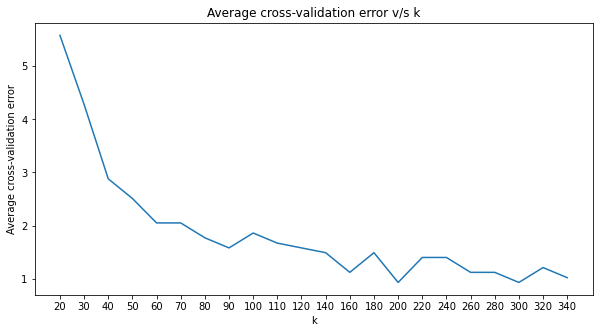

In [34]:
plt.figure(figsize=(10,5))
plt.title('Average cross-validation error v/s k')
plt.xlabel("k")
plt.ylabel("Average cross-validation error")
plt.xticks(np.arange(len(k_values)),labels=k_values)
plt.plot(average_error)
plt.show()

The ideal value of k is between 180-320, i.e. we should check whether the algorithm makes any mistake or not  for around 200-320 iterations for good results.

**Finding the best learning rate for the algorithm the given data set:** <br>
The value of k is kept fixed as 300


In [35]:
learning_rates=[1,0.5,0.1,0.05,0.01,0.005,0.001]
average_error=[]
for l in learning_rates :
    error = cross_validation(data_train,5,l,300)
    average_error.append(error)

In [36]:
average_error

[1.21, 1.21, 1.21, 1.21, 1.02, 1.4, 2.6]

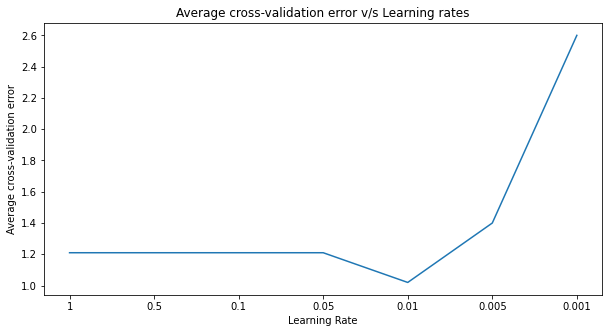

In [37]:
plt.figure(figsize=(10,5))
plt.title('Average cross-validation error v/s Learning rates')
plt.xlabel("Learning Rate")
plt.ylabel("Average cross-validation error")
plt.xticks(np.arange(len(learning_rates)),labels=learning_rates)
plt.plot(average_error)
plt.show()

**Conclusion:** It's difficult to draw any conclusion for learning rate for the algorithm, as the graph changes every time the code is executed. So, I am going to stick with learning rate = 1 for the best model.(1 was the value given in slides)

### Training the best model:
Learning rate = 1 and k = 300

In [38]:
y_train=data_train[:,-1]
x_train=data_train[:,:-1]

In [39]:
w=stochaistic_subGD(x_train,y_train, H=1, k=300)

### Calculating the $ F_{1} $ score on the held out set for the best model :
<br>
Here, TP means True positive, FP means False positive and FN means False negative. <br><br>
<center>p = $ \frac {TP}{TP+FP} $ <br><br>
r = $ \frac {TP}{TP+FN} $ </center> <br> <br> 
where, p is the precision and r is the recall. <br><br>
 <center>   $F_{1}$ = $\frac {2pr}{p+r}$ <br> <br>
    $ \implies $ $F_{1}$ = $\frac {TP}{TP+0.5*(FP+FN)}$ 

In [40]:
def f1_score(y_pred,y_test) :
    TP=0
    FP=0
    FN=0
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1 :
            TP=TP+1
        elif y_test[i] == -1 and y_pred[i] == 1 :
            FP=FP+1
        elif y_test[i] == 1 and y_pred[i] == -1 :
            FN=FN+1
    #print(TP,FP,FN)
    F1=TP/(TP+0.5*FP+0.5*FN)
    return F1

In [41]:
y_test=data_test[:,-1]
x_test=data_test[:,:-1]

In [42]:
y_pred=predict(x_test,y_test,w)

In [43]:
print('The F1 score on held out validation set is:',f1_score(y_pred,y_test))

The F1 score on held out validation set is: 0.9916666666666667


### <center> Answer 2 <center>
*There are will be a few warnings while execution of the code below. Kindly, ignore those.*

**Generating 50 random samples from a normal distribution with mean 10 and SD 5:**

In [44]:
np.random.seed(2021)
X=5*np.random.randn(50)+10

The function below helps in plotting the normal distribution :

In [45]:
def normpdf(x, mu, sigma) :
    u = (x-mu)/abs(sigma)
    y = (1/(np.sqrt(2*np.pi)*abs(sigma)))*np.exp(-u*u/2)
    return y

**Likelihood for the data samples:**

- There are 50 independent trials. ( n = 50 ) <br>
- Each data sample is drawn from a normal distribution i.e. N($ \mu$ = 10, $\sigma^{2}$ = 25)

P($ x_{1},x_{2},...,x_{n}$| $\mu$,$\sigma^{2}$) = L($\mu,\sigma^{2}$) = $ \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^{2}}}$exp$ (\frac {-1}{2 \sigma^{2}} (x_{i}-\mu)^2)$ <br><br>
  $\propto \frac {1}{\sigma}exp(\frac {-1}{2 \sigma^{2}}\sum_{i=1}^{n}(x_{i}-\mu)^2)$ <br><br>
    $\propto exp(\frac {-1}{2 \sigma^{2}}(\sum x_{i}^{2} -2\mu \sum x_{i} + n\mu^{2})) $ <br><br>
     $\propto exp(\frac {-n}{2 \sigma^{2}}( -2\mu \bar{x} + \mu^{2}))$ <br><br>
     $\propto exp(\frac {-n}{2 \sigma^{2}}(\mu - \bar{x})^{2})$ <br><br>
     $\propto exp(\frac {-1}{2 \sigma_{L}^{2}}(\mu - \mu_{L})^{2}) \ $ 
        where, $ \mu_{L}= \bar{x}, \ \sigma_{L}^{2} = \frac {\sigma^{2}}{n}$ 
        
 $ \therefore$ Likelihood ~ N($ \mu_{L} = \bar{x},\sigma_{L}^{2}=\frac {\sigma^{2}}{n} )$

*Calculating $\mu_{L}$ and $\sigma_{L}$ :*

In [46]:
mean_likelihood=np.mean(X)
std_likelihood=5/np.sqrt(len(X))
print(mean_likelihood,std_likelihood)

10.549819182352305 0.7071067811865475


**Plotting the likelihood**

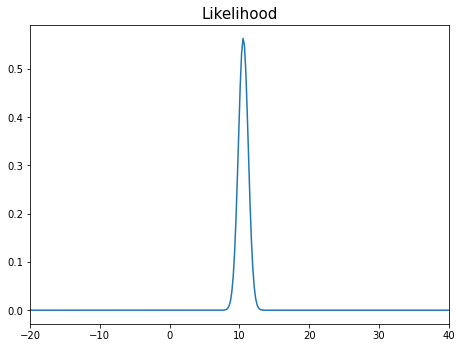

In [47]:
x = np.linspace(-100, 100, 1000)
plt.figure(figsize=(7.5,5.5))
plt.plot(x, normpdf(x,mean_likelihood,std_likelihood))
plt.xlim(-20, 40)
plt.title('Likelihood', fontsize='15')
plt.show()

**Plotting the Prior:** <br> 
$ \mu $ = 25 and
$ \sigma$ = 5

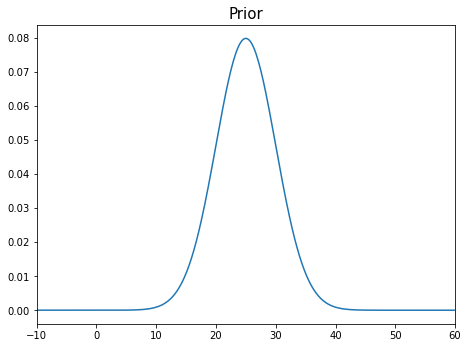

In [48]:
mean_prior=25
std_prior=5
x = np.linspace(-100, 100, 1000)
plt.figure(figsize=(7.5,5.5))
plt.plot(x, normpdf(x,mean_prior,std_prior))
plt.xlim(-10, 60)
plt.title('Prior', fontsize='15')
plt.show()

**Posterior for the data-samples with the given prior:** <br><br>
Prior ~ N($\mu_{p},\sigma_{p}^{2}$) <br><br>
Likelihood ~ N($\bar{x},\frac {\sigma^{2}}{n}$) <br><br>
Posterior ~ Prior * Likelihood <br><br>$ \propto exp(\frac{-1}{2\sigma_{p}^{2}}(\mu-\mu_{p})^{2})exp(\frac{-n}{2\sigma^{2}}(\mu-\bar{x})^{2})$ <br><br>
    $ \propto exp(\frac{-1}{2\sigma_{p}^{2}}(\mu^{2}-2\mu \mu_{p}+\mu_{p}^{2}))exp(\frac{-n}{2\sigma^{2}}(\mu^{2}-2\mu \bar{x}+\bar {x}^{2}))$ <br> <br>
$ \propto exp(\frac{-1}{2}[\mu^{2}(\frac{1}{\sigma_{p}^{2}}+ \frac{n}{\sigma^{2}}) \ - \ 2\mu(\frac{\mu_{p}}{\sigma_{p}^{2}} \ + \ \frac{n\bar{x}}{\sigma^{2}})\ + \ \frac{\mu_{p}^{2}}{\sigma_{p}^{2}}\ + \ \frac{\bar{x}^{2}}{\sigma^{2}}])$ <br> <br>
Posterior ~ N($\mu_{post},\sigma_{post}^{2}$) <br><br>
Comparing, we get : $\mu_{post} \ = \ \frac{\mu_{p}\sigma^{2} + n\bar{x}\sigma_{p}^{2}}{\sigma^{2}+\sigma_{p}^{2}n} $ and $\sigma_{post}^{2}\ = \ \frac{\sigma^{2}\sigma_{p}^{2}}{\sigma^{2}+\sigma_{p}^{2}n}$ <br><br>
Alternatively we can write it as : <br><br>
$\sigma_{post}^{2} \ = \ ( \frac{1}{\sigma_{p}^{2}} + \frac{n}{\sigma^{2}})^{-1} $ <br><br>
$\mu_{post} \ = \ \sigma_{post}^{2}(\frac{\mu_{p}}{\sigma_{p}{2}} + \frac{n\bar{x}}{\sigma^{2}}) $ <br><br>

*The expression derived above is used to plot the posterior:*


In [49]:
def posterior(X, mu,sigma,mu_prior,sigma_prior) :
    p=1/pow((sigma_prior),2)
    q=len(X)/pow((sigma),2)
    inv=p+q
    var=1/inv
    p=p*mu_prior
    q=q*np.mean(X)
    mean=var*(p+q)
    return mean,np.sqrt(var)

In [50]:
mu_posterior, std_posterior = posterior(X,mean_likelihood,5,mean_prior,std_prior)
print(mu_posterior,std_posterior)

10.83315606112971 0.7001400420140049


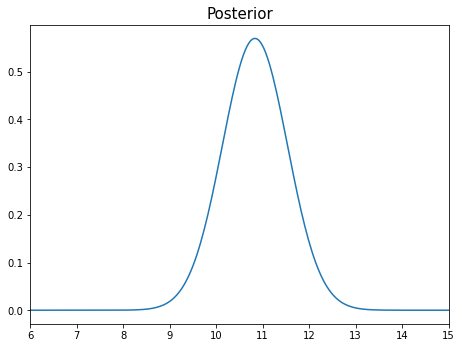

In [51]:
x = np.linspace(-100, 100, 5000)
plt.figure(figsize=(7.5,5.5))
plt.plot(x, normpdf(x,mu_posterior,std_posterior))
plt.xlim(6, 15)
plt.title('Posterior', fontsize='15')
#plt.xlabel('Values of Random Variable X', fontsize='15')
#plt.ylabel('Probability', fontsize='15')
plt.show()

### Plotting the pdf for Likelihood, Posterior and Prior on a single graph:

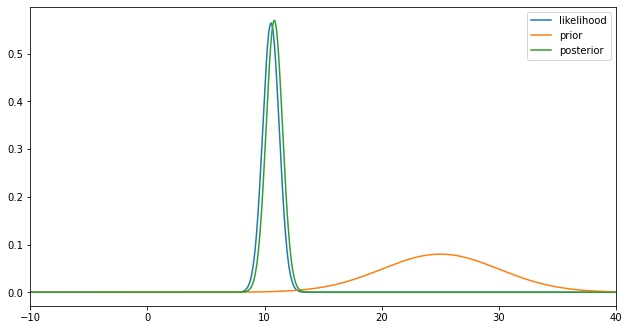

In [52]:
x = np.linspace(-50, 100, 5000)
plt.figure(figsize=(10.5,5.5))
plt.plot(x, normpdf(x,mean_likelihood,std_likelihood),label='likelihood')
plt.plot(x, normpdf(x,mean_prior,std_prior),label='prior')
plt.plot(x, normpdf(x,mu_posterior,std_posterior),label='posterior')
plt.xlim(-10, 40)
#plt.title('Posterior', fontsize='15')
#plt.xlabel('Values of Random Variable X', fontsize='15')
#plt.ylabel('Probability', fontsize='15')
plt.legend()
plt.show()

### Metropolis Algorithm for posterior estimation :

The histograms plotted are the approximations of the posterior using Metropolis.<br><br>

In [53]:
#Calculates probability
def f(x, mu, sigma) :
    u = (x-mu)/abs(sigma)
    y = (1/(np.sqrt(2*np.pi)*abs(sigma)))*np.exp(-u*u/2)
    return y

In [54]:
#Calculates the likelihood
def fl(likehood_sample,mu,sigma) :
    prob = [f(i,mu,sigma) for i in likehood_sample]
    return np.prod(prob)

In [55]:
def metropolis(sigma,N) :
    sample=[1]
    prev_posterior=fl(X,sample[-1],sigma)*f(sample[-1],25,5)
    iterations=[0]
    for i in range(N):
    #sample candidate from normal distribution
        candidate = np.random.normal(sample[-1], sigma)
    
    #calculate probability of accepting this candidate
        prior = f(candidate,25,5)
        likelihood = fl(X,candidate,sigma)
        current_posterior = likelihood*prior
        prob = min(1,(current_posterior/prev_posterior))


        #accept with the calculated probability
        if np.random.random() < prob :
            sample.append(candidate)
            prev_posterior=current_posterior
            
        else :
            sample.append(sample[-1])

        
        iterations.append(i+1)
        
        
    return iterations,sample

Posterior estimation with width = 6 and sampled for 2L iterations:<br><br>
*The code below takes some time to get executed(worst case 2 Minutes) Kindly let it run for the same*

In [56]:
iterations,sample=metropolis(6,200000)
burn_in = 1000
retained_samples = sample[burn_in+1:]

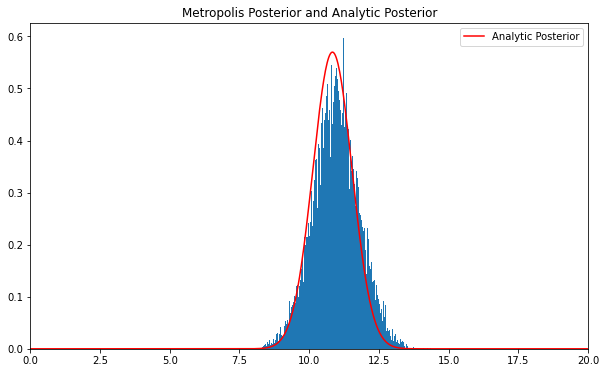

Approximated Value: 10.96
True Exp. Value: 10.55


In [57]:
plt.figure(figsize=(10,6))
plt.hist(retained_samples, bins=500,density=True,stacked=True)
plt.plot(x, normpdf(x,mu_posterior,std_posterior),label='Analytic Posterior',color='r')
plt.xlim(0,20)
plt.legend()
plt.title('Metropolis Posterior and Analytic Posterior')
#plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(X), 2)), fontsize=20)
plt.show()
print('Approximated Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2),round(np.mean(X), 2)))

**Samples vs iteration graphs for different SD(widths):** <br><br>
*The codes below take some time to get executed(Worst case- 2 Minutes for each cell), kindly let it run for the same.*<br><br>
The graphs below are drawn to get some idea about the convergence of the algorithm.

*Width = 3*

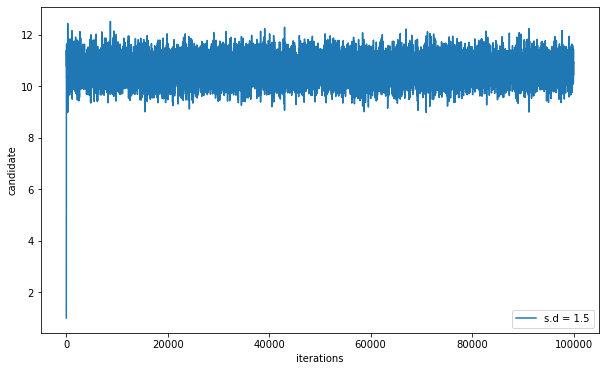

In [58]:
iterations,sample=metropolis(3,100000)
plt.figure(figsize=(10,6))
plt.plot(iterations,sample,label='s.d = 1.5')
plt.ylabel('candidate')
plt.xlabel('iterations')
plt.legend()
plt.show()

*Width = 5*

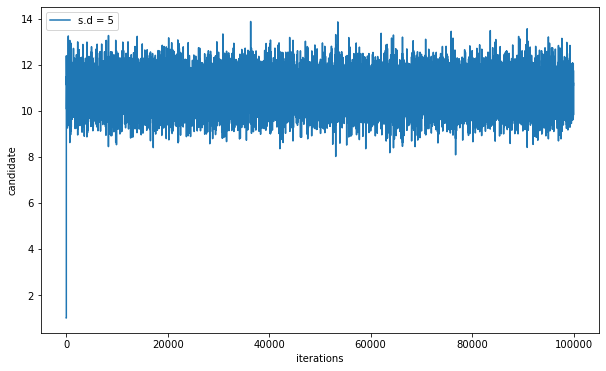

In [59]:
iterations,sample=metropolis(5,100000)
plt.figure(figsize=(10,6))
plt.plot(iterations,sample,label='s.d = 5')
plt.ylabel('candidate')
plt.xlabel('iterations')
plt.legend()
plt.show()

*Width = 10*

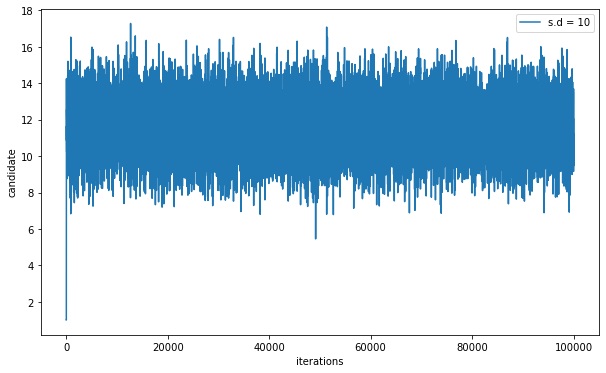

In [60]:
iterations,sample=metropolis(10,100000)
plt.figure(figsize=(10,6))
plt.plot(iterations,sample,label='s.d = 10')
plt.ylabel('candidate')
plt.xlabel('iterations')
plt.legend()
plt.show()

**Effect of width on convergence:** 
From the above graphs it can be seen that when width is large the selected candidates tend to spread more. Therefore, for a very large width convergence might take more number of iterations and might not give a good approximation.

### Implementation of convergence in the Metropolis algorithm: 
We can say that the algorithm has converged when the statistics(mean/mode) of the samples generate don't change by much.<br><br>
**Note:** <br>
- Below, I have used mean to check for convergence.
- The change in mean is checked in the following manner:<center>
    - Look into the last 3*k(=2400, default value) samples.
    - Divide the last 3*k samples into two parts as old and current.
    - Old contains the first 2*k(=1600) samples and current contains the next k(=800) samples
    - If the difference of mean of old and current is less than the tolerance(1e-04) then break. i.e. The algorithm has converged. </center>
    <br><br>

- The algorithm runs for a minimum of min_samples(=10K) number of iterations, and then we check for convergence. This is done because there has to be some burn in period and the approximation is not reliable without enough samples.

In [61]:
def check_convergence(sample,k) :
    current=sample[-k:-1]
    old=sample[-3*k:-k]
    if np.abs(np.mean(current)-np.mean(old)) < 1e-04 :
        return 1
    return 0

In [62]:
def metropolis_convergence(sigma,N, k = 800,min_samples=10000) :
    sample=[1]
    prev_posterior=fl(X,sample[-1],sigma)*f(sample[-1],25,5)
    iterations=[0]
    for i in range(N):
    #sample candidate from normal distribution
        candidate = np.random.normal(sample[-1], sigma)
    
    #calculate probability of accepting this candidate
        prior = f(candidate,25,5)
        likelihood = fl(X,candidate,sigma)
        current_posterior = likelihood*prior
        prob = min(1,(current_posterior/prev_posterior))

        iterations.append(i+1)
        #accept with the calculated probability
        if np.random.random() < prob :
            sample.append(candidate) 
            prev_posterior=current_posterior
        else :
            sample.append(sample[-1])
        if i > min_samples :
            if (check_convergence(sample,k)) :
                print('converged at '+str(i)+' for width = '+str(sigma))
                break
    
    burn_in = 1000
    retained_samples = sample[burn_in+1:]  
          
    return iterations,retained_samples

**Checking the speed of convergence with varying widths:**<br>
The speed of convergence is checked with respect to number of iterations and the convergence criteria used is stated above.

In [63]:
widths=[i for i in range(1,10,1)]
converged=[]
values=[]
for w in widths :
    iterations,sample=metropolis_convergence(w,100000,800,10000)
    values.append(np.mean(sample))
    converged.append(iterations[-1])

/tmp/ipykernel_25278/1647434770.py:13: RuntimeWarning: invalid value encountered in double_scalars
  prob = min(1,(current_posterior/prev_posterior))
/tmp/ipykernel_25278/1647434770.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  prob = min(1,(current_posterior/prev_posterior))


converged at 10008 for width = 1
converged at 10323 for width = 2
converged at 10342 for width = 3
converged at 11356 for width = 4
converged at 10807 for width = 5
converged at 11875 for width = 6
converged at 12610 for width = 7
converged at 10316 for width = 8
converged at 12947 for width = 9


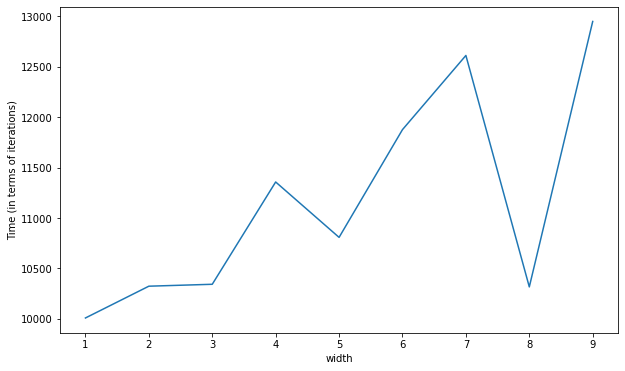

In [64]:
plt.figure(figsize=(10,6))
plt.plot(widths,converged)
plt.xticks(widths)
plt.ylabel('Time (in terms of iterations)')
plt.xlabel('width')
plt.show()

**Plotting the approximation with varying widths:**

/tmp/ipykernel_25278/1647434770.py:13: RuntimeWarning: invalid value encountered in double_scalars
  prob = min(1,(current_posterior/prev_posterior))
/tmp/ipykernel_25278/1647434770.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  prob = min(1,(current_posterior/prev_posterior))


converged at 17304 for width = 2


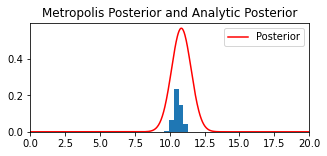

converged at 10836 for width = 4


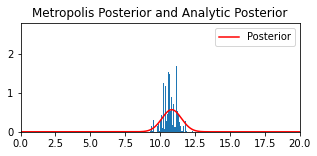

converged at 10021 for width = 5


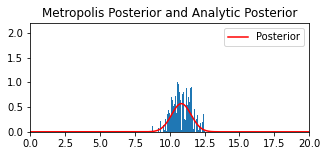

converged at 15048 for width = 6


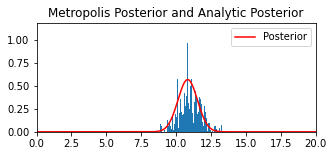

converged at 17456 for width = 7


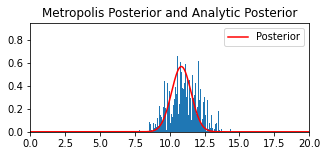

converged at 16091 for width = 10


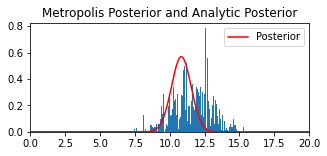

converged at 16854 for width = 20


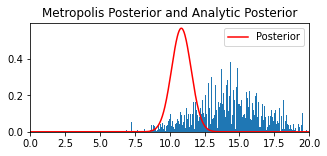

In [65]:
widths=[2,4,5,6,7,10,20]

for w in widths :
    iterations,sample=metropolis_convergence(w,100000,800,10000)
    plt.figure(figsize=(5,2))
    plt.hist(sample, bins=1000, density=True)
    plt.plot(x, normpdf(x,mu_posterior,std_posterior),label='Posterior',color='red')
    plt.xlim(0,20)
    plt.legend()
    plt.title('Metropolis Posterior and Analytic Posterior')
    #plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(X), 2)), fontsize=20)
    plt.show()


**Optimal Width:**
An optimal width that would work best lies somewhere between 4 and 7. (Not only according to speed of convergence, but also helps in better approximation)

**Conclusion:** <br>
From the above graphs it can be said that the algorithm converges after sufficient number of iterations for different widths. <br>
But with very few samples the approximation isn't nice.

### Posterior estimation using optimal width and convergence:
Width = 6.1, convergence is checked after 30K samples are collected.

converged at 32308 for width = 6.1


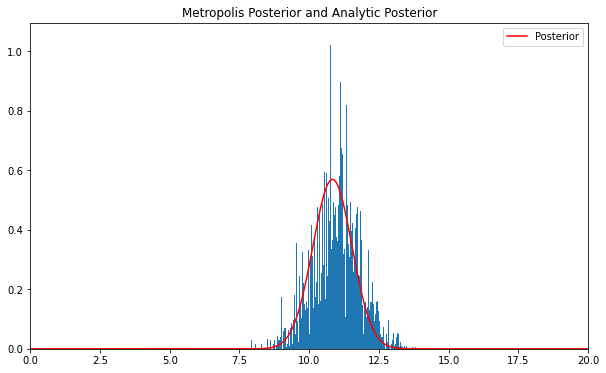

Approximated Value: 10.96
True Exp. Value: 10.55


In [66]:
iterations,sample=metropolis_convergence(6.1,100000,1000,30000)
plt.figure(figsize=(10,6))
plt.hist(sample, bins=1000, density=True)
plt.plot(x, normpdf(x,mu_posterior,std_posterior),label='Posterior',color='red')
plt.xlim(0,20)
plt.legend()
plt.title('Metropolis Posterior and Analytic Posterior')
#plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(X), 2)), fontsize=20)
plt.show()
print('Approximated Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2),round(np.mean(X), 2)))

#### Effects of early stopping:
- When the algorithm has run for sufficient number of times(With very few samples the approximation is not reliable) and then checked for convergence, it gives satisfactory results.

 *Below is an example of early stopping without sufficient number of samples:*

converged at 5363 for width = 6.1


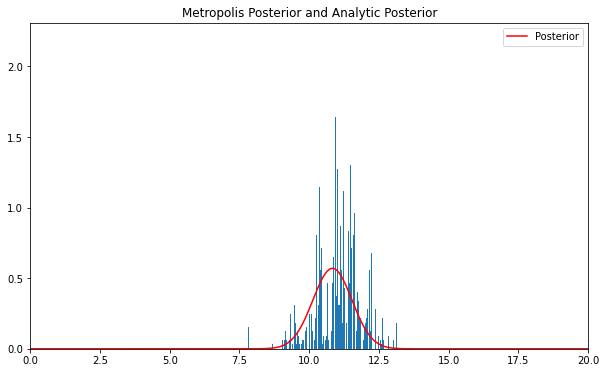

In [67]:
iterations,sample=metropolis_convergence(6.1,100000,50,500)
plt.figure(figsize=(10,6))
plt.hist(sample, bins=900, density=True)
plt.plot(x, normpdf(x,mu_posterior,std_posterior),label='Posterior',color='r')
plt.xlim(0,20)
plt.legend()
plt.title('Metropolis Posterior and Analytic Posterior')
#plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(X), 2)), fontsize=20)
plt.show()


**Conclusion:** Early stopping when sufficient number of samples are not generated might not give the best results. So, it is better to set some burn in period and stop after a sufficient number of samples are witnessed by the algorithm. <br>


*Kindly, re-run the code if some weird results are produced (like, no histogram gets plotted). This might happen once in a 100 times, because of random samples being generated* <br><br>